In [18]:
from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
from rdkit import DataStructs

In [4]:
suppl = ch.SDMolSupplier('../data/drugbank.sdf')
mols = [x for x in suppl if x is not None]

In [31]:
nicotine = ch.MolFromSmiles('CN(CCC1)[C@@H]1C2=CC=CN=C2')
nicotine = ch.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
nicotine_fingerprint = ch.GetMorganFingerprint(nicotine, 2)

In [32]:
mols_fps = [(m, ch.GetMorganFingerprint(m, 2)) for m in mols]

In [33]:
mols_nicotinesim = [(m, DataStructs.TanimotoSimilarity(fp, nicotine_fingerprint))
                    for m, fp in mols_fps]
sorted_mols_nicotinesim = sorted(mols_nicotinesim, key=lambda x: x[1], reverse=True)
result = sorted_mols_nicotinesim[:20]

In [34]:
map(ch.Compute2DCoords, (m for m, sim in result))
img = d.MolsToGridImage([m for m, sim in result], kekulize=False, subImgSize=(400,400),
                        legends=[mol.GetProp("GENERIC_NAME") + ': ' + str(sim)
                                 for mol, sim in result])

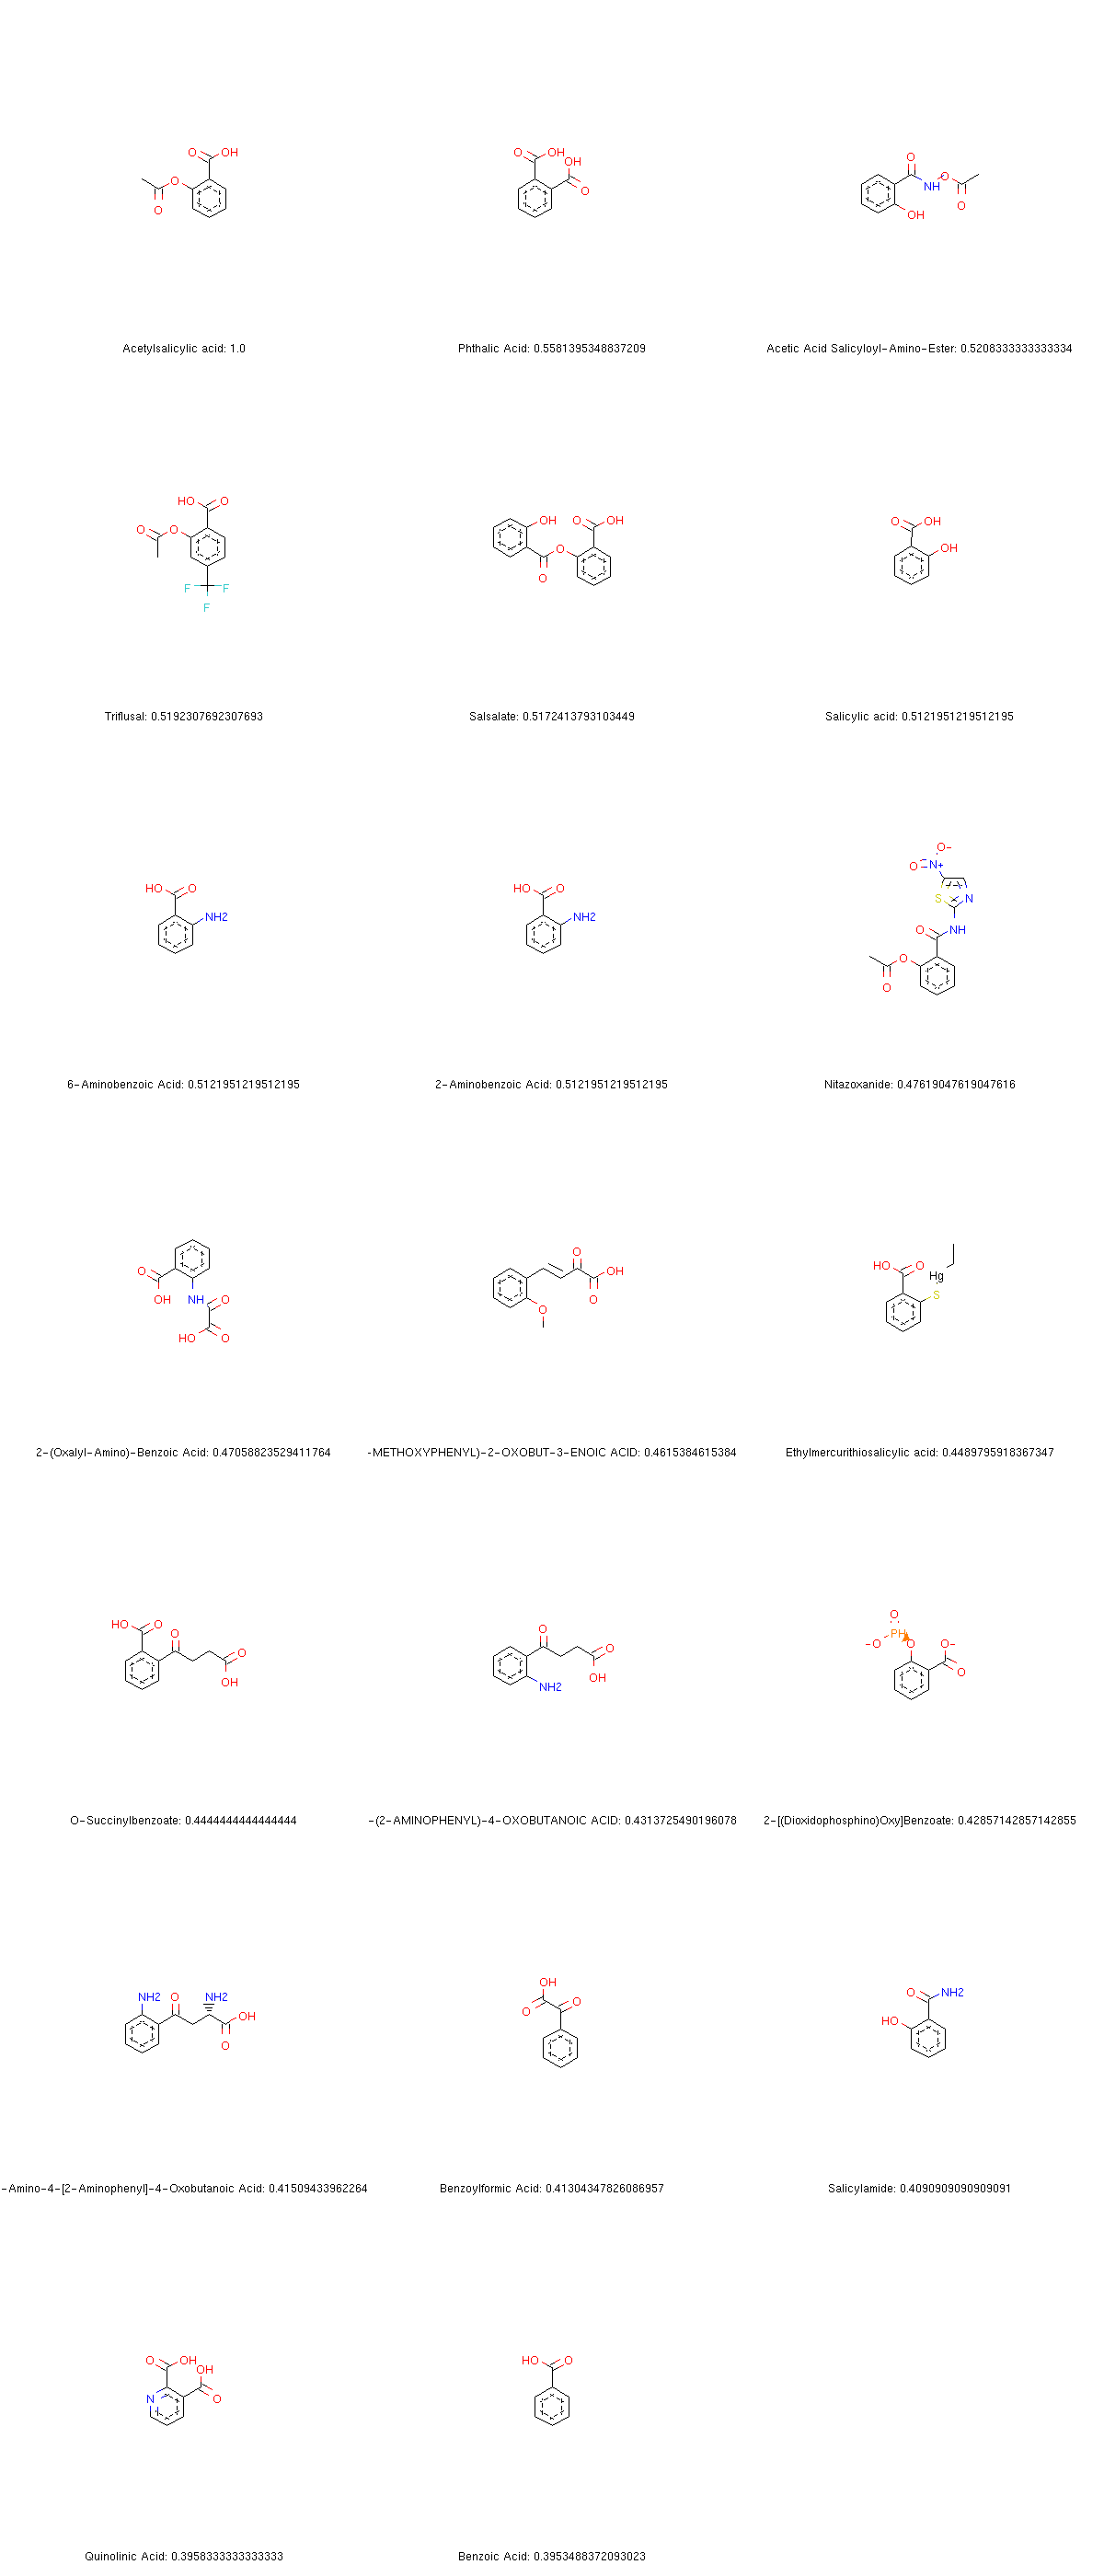

In [35]:
img